MCD15A3H.A2020081.h17v03.006.2020086034006.hdf
MCD15A3H.A2020081.h17v04.006.2020086032029.hdf
MCD15A3H.A2020081.h18v03.006.2020086033548.hdf
MCD15A3H.A2020081.h18v04.006.2020086032044.hdf


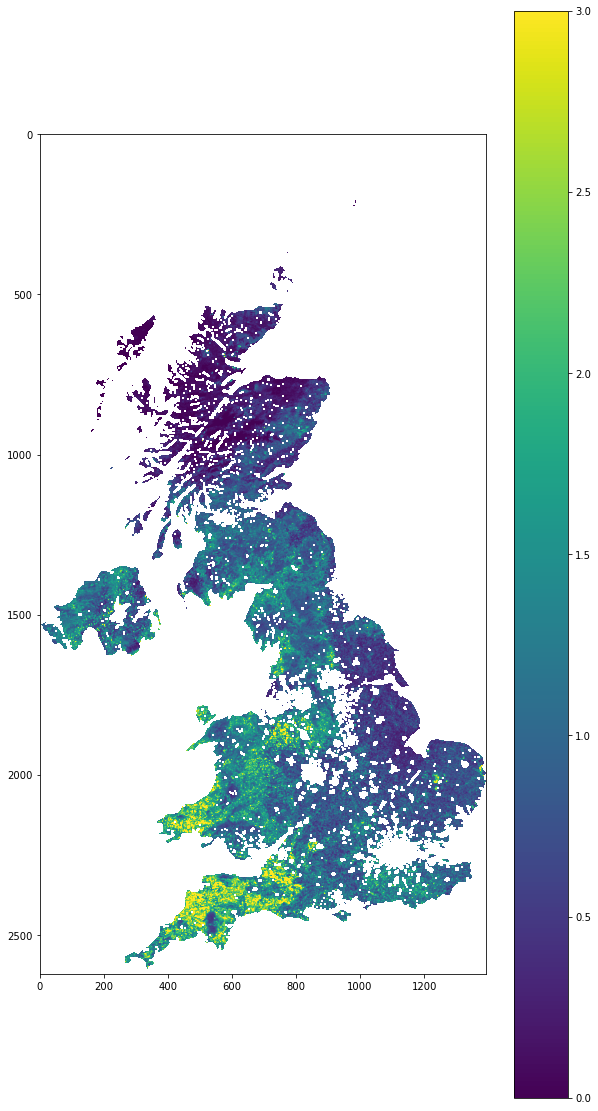

In [12]:
from uclgeog.process_timeseries import process_single_date,get_world
from uclgeog.get_modis_files import get_modis_files

import gdal
import matplotlib.pylab as plt
# UK tiles
tiles = []
for h in [17, 18]:
    for v in [3, 4]:
        tiles.append(f'h{h:02d}v{v:02d}')

country_code = 'UK'
# specify day of year (DOY) and year
doy,year = 1+8*10,2020

shpfile = get_world(force=True).replace('.zip','.shp')
folder="data/"
layer="Lai_500m"
product='MCD15A3H'

# download data from NASA server
mfiles = get_modis_files(doy,year,tiles,product=product,version=6,\
                      destination_folder=folder,verbose=True,\
                      base_url='https://e4ftl01.cr.usgs.gov/MOTA')

# extract data for single date
lai_data, weights = process_single_date(tiles,
                    doy,
                    year,
                    folder=folder,
                    shpfile=shpfile,
                    country_code=country_code)
mask = (weights > 0).astype(float)
mask[mask==0] = np.nan
plt.figure(figsize=(10,20))
plt.imshow(lai_data * mask,vmax=3)
plt.colorbar()

In [13]:
files = [1,2,3]

In [15]:
print(f'{list(files)}')

[1, 2, 3]
